Bayes classifier accuracy: 0.85


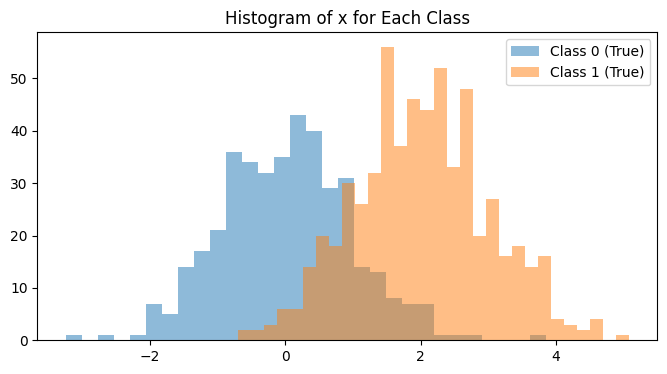

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples=1000, 
                  prior_y0=0.5, 
                  mu0=0.0, sigma0=1.0, 
                  mu1=2.0, sigma1=1.0, 
                  random_seed=42):
    """
    Generate a 1D dataset for two classes (y=0, y=1).
    x|y=0 ~ Normal(mu0, sigma0^2)
    x|y=1 ~ Normal(mu1, sigma1^2)
    priors: P(y=0)=prior_y0, P(y=1)=1 - prior_y0
    """
    np.random.seed(random_seed)

    # Number of samples for each class based on the prior
    n_y0 = int(n_samples * prior_y0)
    n_y1 = n_samples - n_y0
    
    # Generate samples for each class
    x_y0 = np.random.normal(loc=mu0, scale=sigma0, size=n_y0)
    x_y1 = np.random.normal(loc=mu1, scale=sigma1, size=n_y1)

    # Concatenate and create labels
    x_all = np.concatenate([x_y0, x_y1])
    y_all = np.array([0]*n_y0 + [1]*n_y1)
    
    return x_all, y_all

def gaussian_pdf(x, mean, std):
    """
    Compute value of the probability density function for a normal distribution.
    """
    return (1.0 / (np.sqrt(2.0 * np.pi) * std) * 
            np.exp(-0.5 * ((x - mean) / std) ** 2))

def bayes_classifier(x_test, 
                     prior_y0, 
                     prior_y1, 
                     mu0, sigma0, 
                     mu1, sigma1):
    """
    For each x in x_test, compute the posterior probabilities for y=0 and y=1,
    and return the class (0 or 1) that has the higher posterior.
    
    Posterior P(y=0|x) = P(x|y=0)*P(y=0) / P(x)
    Posterior P(y=1|x) = P(x|y=1)*P(y=1) / P(x)
    
    The denominator P(x) is the same for both classes, so for classification,
    we compare:
    
       P(x|y=0)*P(y=0)  vs.  P(x|y=1)*P(y=1).
    """
    post_y0 = gaussian_pdf(x_test, mu0, sigma0) * prior_y0
    post_y1 = gaussian_pdf(x_test, mu1, sigma1) * prior_y1
    
    # Bayes optimal decision rule: pick the class with higher posterior
    y_pred = np.where(post_y0 > post_y1, 0, 1)
    return y_pred

if __name__ == "__main__":
    # Parameters
    n_samples = 1000
    prior_y0  = 0.4  # P(y=0)
    prior_y1  = 1.0 - prior_y0  # P(y=1)
    mu0, sigma0 = 0.0, 1.0
    mu1, sigma1 = 2.0, 1.0

    # Generate synthetic data
    x_all, y_all = generate_data(n_samples=n_samples,
                                 prior_y0=prior_y0,
                                 mu0=mu0, sigma0=sigma0,
                                 mu1=mu1, sigma1=sigma1,
                                 random_seed=42)

    # Classify using the Bayes optimal classifier
    y_pred = bayes_classifier(x_all, 
                              prior_y0, prior_y1, 
                              mu0, sigma0, 
                              mu1, sigma1)

    # Compute accuracy
    accuracy = np.mean(y_pred == y_all)
    print(f"Bayes classifier accuracy: {accuracy:.2f}")

    # Plot histogram of x for each class
    plt.figure(figsize=(8, 4))
    plt.hist(x_all[y_all == 0], bins=30, alpha=0.5, label="Class 0 (True)")
    plt.hist(x_all[y_all == 1], bins=30, alpha=0.5, label="Class 1 (True)")
    plt.title("Histogram of x for Each Class")
    plt.legend()
    plt.show()
